In [85]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
fig_width = 4.0
fig_height = 5.0  #fig_width*0.6
fig_size = [fig_width,fig_height]
params = {'backend': 'pdf',
          'font.size'      : 30*fig_width/8.5,
          'axes.labelsize' : 30*fig_width/8.5,
          'xtick.labelsize': 30*fig_width/8.5,
          'ytick.labelsize': 30*fig_width/8.5,
          'text.usetex'    : True,
          'figure.figsize' : fig_size,
          'figure.dpi'     : 300,
          'axes.unicode_minus': True}
mpl.rcParams.update(params)

In [6]:
# Fiore21_psrs_in_ATNF = ["J0636+5129", "J0141+63", "J0214+5222", "J1434+7257", "J1239+32", "J1816+4510", "J1530-21", "J2145+21", "J2113+67", "J2354-22", "J1505-25", "J1913+3732", "J2105+28", "J2210+57", "J2326+6141", "J1929+66"]
# Fiore21_new_psrs = ["J1327+3423", "J0032+6946", "J0415+6111"]
# Fiore21_new_psrs_Fs = [24.0890080793560344, 27.1711195247098765, 2.2717493334899452]
# Fiore21_new_psrs_Fdots = [-6.974302318055e-17, -2.633863961856e-15, -3.279311632585e-16]
pars = sorted(glob.glob(f"data/*_fiore+23.par"))
Fiore_23_psrs = [
    "J0032+6946","J0034+69",
    "J0141+6303","J0141+62",
    "J0214+5222",
    "J0415+6111","J0417+61",
    "J0636+5128","J0636+5129",
    "J0957-0619",
    "J1239+3239",
    "J1327+3423",
    "J1434+7257",
    "J1505-2524",
    "J1530-2114",
    "J1816+4510",
    "J1913+3732","J1911+37",
    "J1929+6630",
    "J1930+6205","J1929+62",
    "J2104+2830","J2105+28",
    "J2115+6702","J2113+67",
    "J2145+2158",
    "J2210+5712",
    "J2326+6243","J2327+62",
    "J2354-2250","J2353-22"]

In [20]:
Fiore_23_P0s = []
Fiore_23_P1s = []
Fiore_23_binaries = []
for p in pars:
    binary = False
    with open(p, 'r') as infile:
        f2 = "--"
        for l in infile.readlines():
            if l.startswith("F0"):
                F0      = float(l.split()[1])
                P0 = 1./F0
            elif l.startswith("F1"):
                F1      = float(l.split()[1])
                P1 = -F1/(F0**2)
            elif l.startswith("BINARY"):
                binary = True
        Fiore_23_P0s.append(P0)
        Fiore_23_P1s.append(P1)
        Fiore_23_binaries.append(binary)
Fiore_23_isolated = [not x for x in Fiore_23_binaries]

In [4]:
atnf_pulsars = np.genfromtxt("data/atnf.txt", dtype=str, usecols=(3,5,8,11,14,17,20,21,22))

In [5]:
Jnames        = atnf_pulsars[:,0]
RAs           = atnf_pulsars[:,1]
DECs          = atnf_pulsars[:,2]
Ps            = atnf_pulsars[:,3]
Pdots         = atnf_pulsars[:,4]
Pbs           = atnf_pulsars[:,5]
MinCompMasses = atnf_pulsars[:,6]
Surveys       = atnf_pulsars[:,7]
Types         = atnf_pulsars[:,8]

In [8]:
n = len(RAs)
ppdot_Ps           = []
ppdot_Pdots        = []
ppdot_is_binary    = []
ppdot_is_gbncc     = []
for i in range(n):
    if Pdots[i] == "*" or Jnames[i] in Fiore_23_psrs:
        continue
    else:
        P    = float(Ps[i])
        Pdot = float(Pdots[i])
        if Pbs[i] != "*" or "BINARY" in Types[i]:
            is_binary = np.True_
        else:
            is_binary = np.False_
        if Surveys[i][:5] == "gbncc":
            is_gbncc = np.True_
        else:
            is_gbncc = np.False_
    ppdot_Ps.append(P)
    ppdot_Pdots.append(Pdot)
    ppdot_is_binary.append(is_binary)
    ppdot_is_gbncc.append(is_gbncc)

In [10]:
ppdot_not_binary_or_gbncc = [not x and not y for x,y in zip(ppdot_is_binary, ppdot_is_gbncc)]
ppdot_is_binary_not_gbncc = [x and not y for x,y in zip(ppdot_is_binary, ppdot_is_gbncc)]
ppdot_not_binary_is_gbncc = [not x and y for x,y in zip(ppdot_is_binary, ppdot_is_gbncc)]
ppdot_is_binary_and_gbncc = [x and y for x,y in zip(ppdot_is_binary, ppdot_is_gbncc)]

In [21]:
ppdot_Ps_not_binary_or_gbncc = np.array(ppdot_Ps)[ppdot_not_binary_or_gbncc]
ppdot_Pdots_not_binary_or_gbncc = np.array(ppdot_Pdots)[ppdot_not_binary_or_gbncc]
ppdot_Ps_is_binary_not_gbncc = np.array(ppdot_Ps)[ppdot_is_binary_not_gbncc]
ppdot_Pdots_is_binary_not_gbncc = np.array(ppdot_Pdots)[ppdot_is_binary_not_gbncc]
ppdot_Ps_not_binary_is_gbncc = np.array(ppdot_Ps)[ppdot_not_binary_is_gbncc]
ppdot_Pdots_not_binary_is_gbncc = np.array(ppdot_Pdots)[ppdot_not_binary_is_gbncc]
ppdot_Ps_is_binary_and_gbncc = np.array(ppdot_Ps)[ppdot_is_binary_and_gbncc]
ppdot_Pdots_is_binary_and_gbncc = np.array(ppdot_Pdots)[ppdot_is_binary_and_gbncc]
ppdot_Ps_not_binary_is_thispaper = np.array(Fiore_23_P0s)[Fiore_23_isolated]
ppdot_Pdots_not_binary_is_thispaper = np.array(Fiore_23_P1s)[Fiore_23_isolated]
ppdot_Ps_is_binary_is_thispaper = np.array(Fiore_23_P0s)[Fiore_23_binaries]
ppdot_Pdots_is_binary_is_thispaper = np.array(Fiore_23_P1s)[Fiore_23_binaries]

In [72]:
def P1_from_Edot(P0,Edot,I=(10**45)*u.g*u.cm**2): # takes P0 and Edot in any units
    P1 = (-Edot*P0**3)/(4.*I*np.pi**2)
    return P1.to(u.s/u.s).value

def P1_from_B(P0,Bchar): # takes P0 and Bchar in any units
    B = Bchar.to(u.gauss).value
    P = P0.to(u.s).value
    P1 = ((B/3.2e19)**2)/P
    return P1

def P1_from_age(P0,Tchar): # takes P0 and Tchar in any units
    P1 = P0/(2.*Tchar)
    return P1.to(u.s/u.s).value

In [58]:
Edots = np.array([-1e28,-1e31,-1e34,-1e37,-1e40])*u.erg/u.s
Bchars = np.array([1e8,1e10,1e12,1e14])*u.gauss
Tchars = np.array([1e3,1e5,1e7,1e9,1e11])*u.yr
P0s = np.array([8.0e-4,30.])*u.s

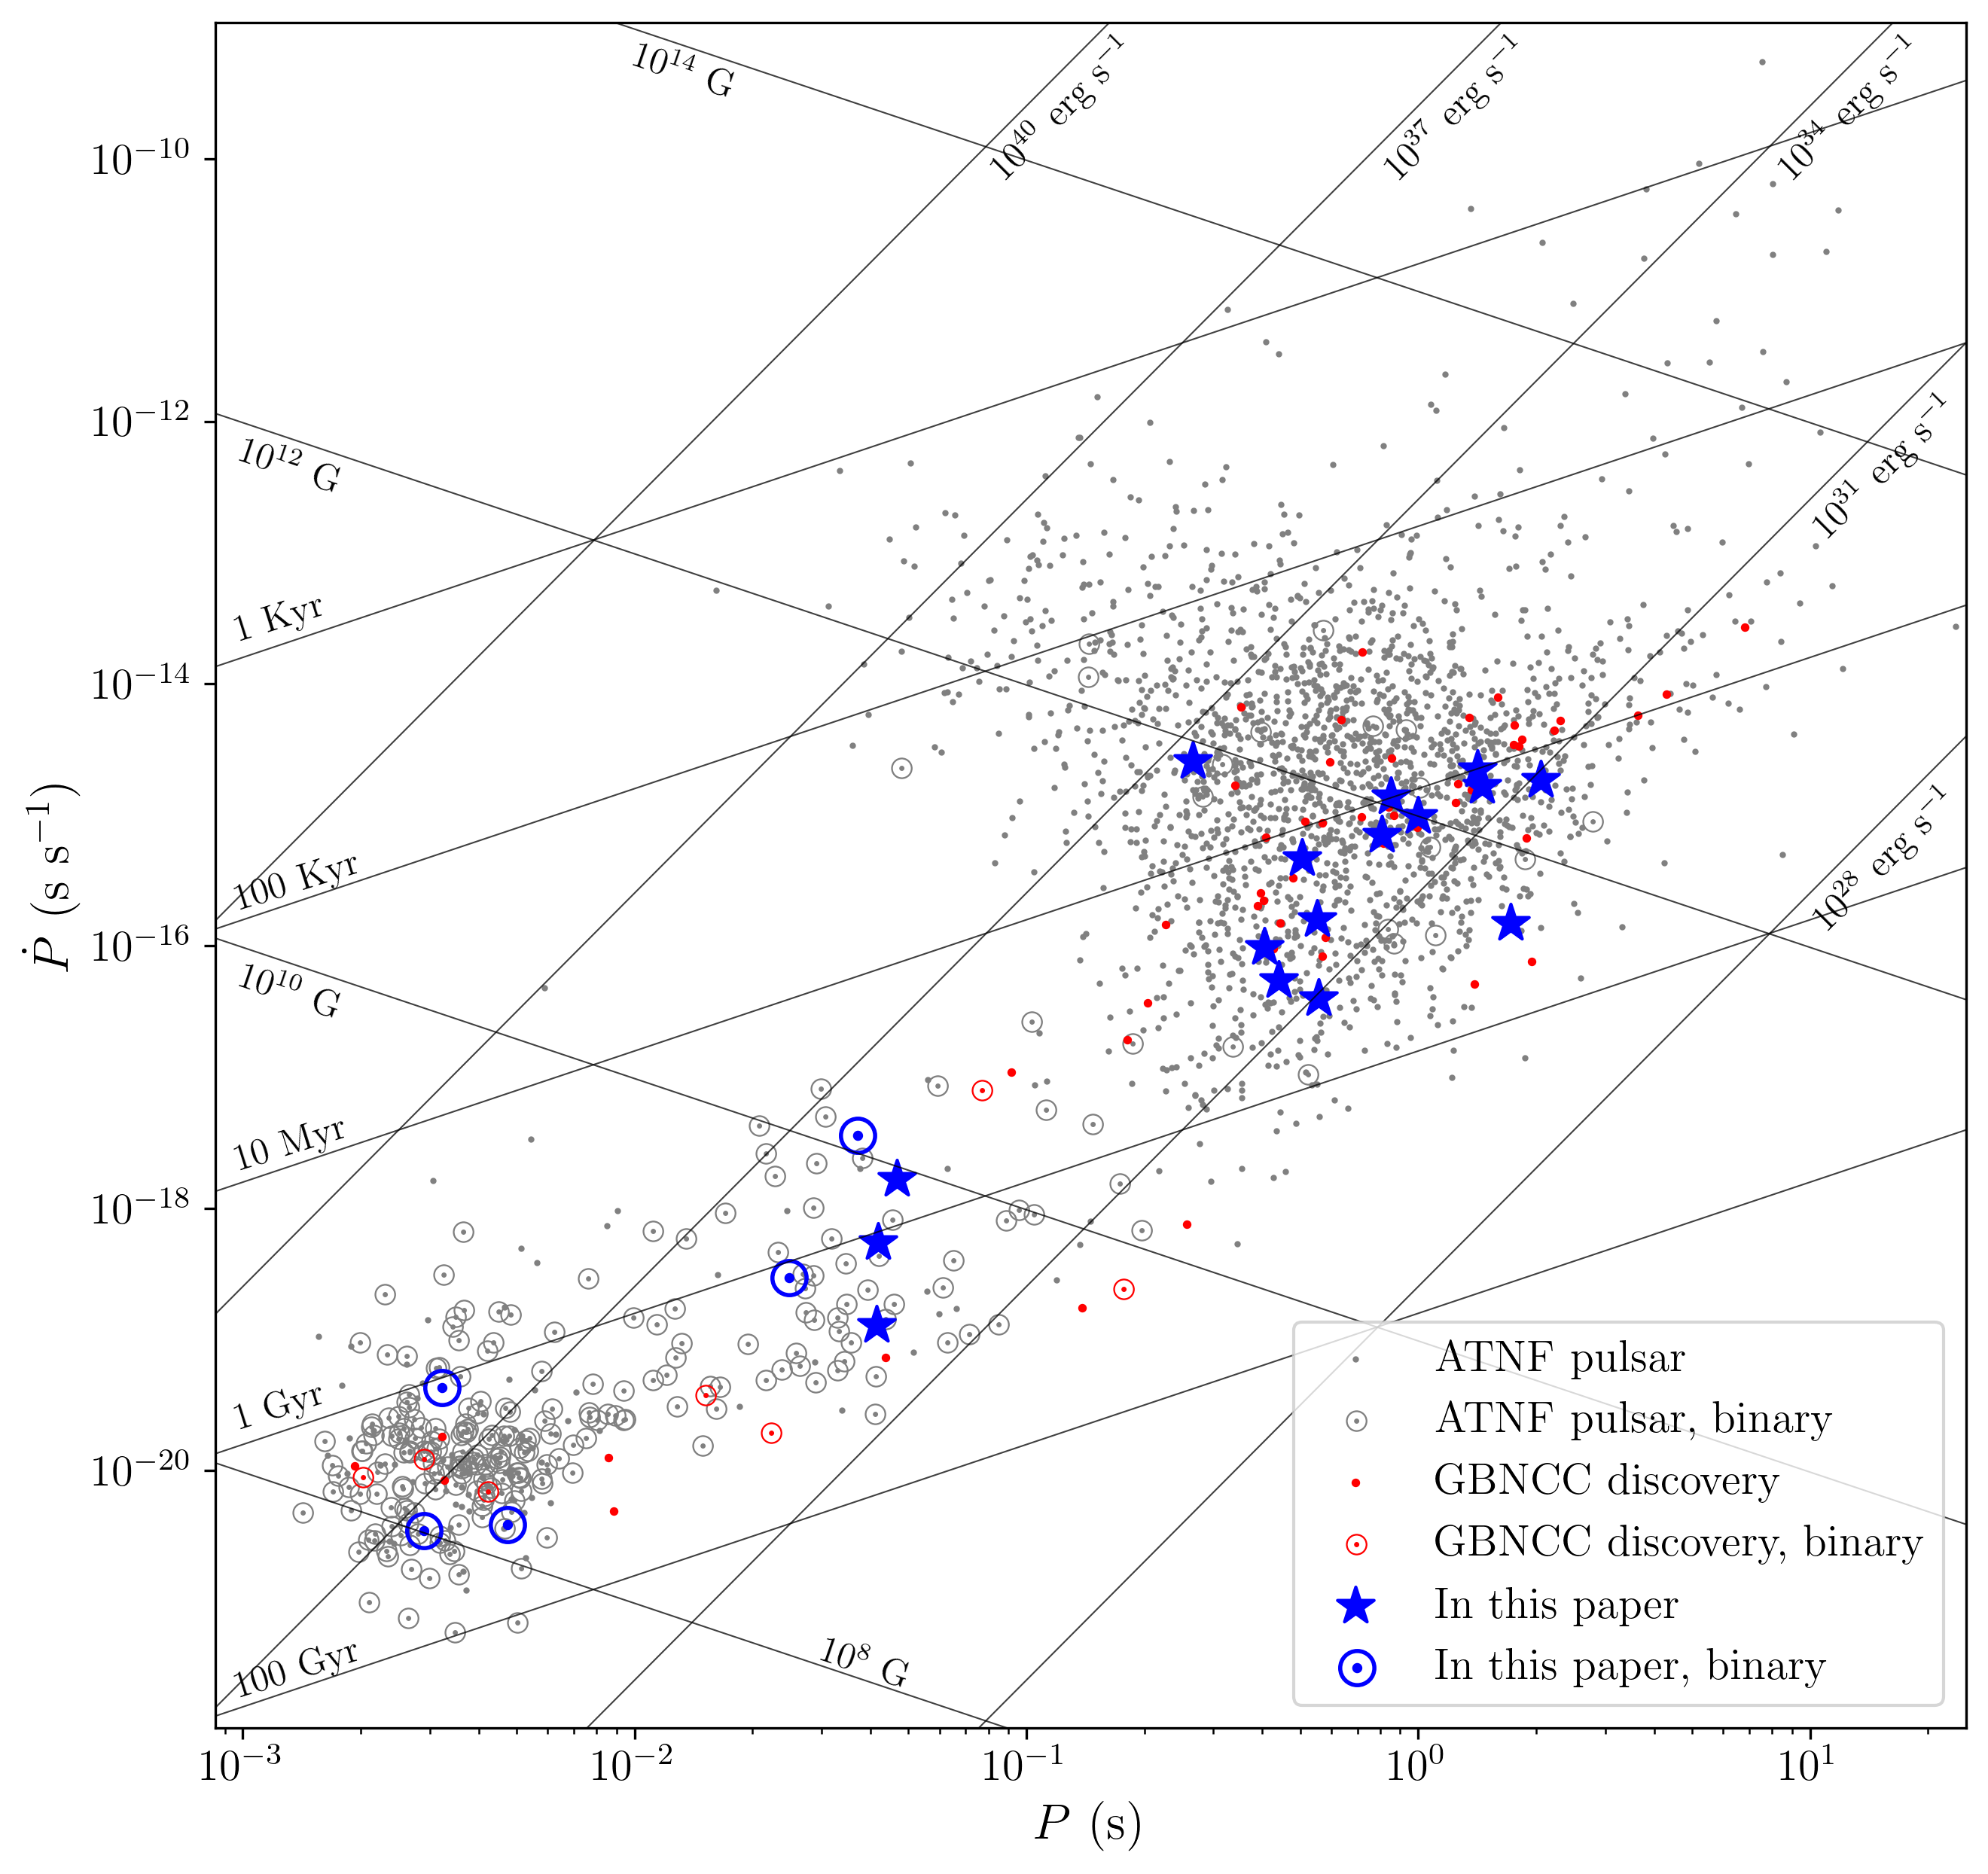

In [150]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot()
ax.scatter(ppdot_Ps_not_binary_or_gbncc,ppdot_Pdots_not_binary_or_gbncc,s=1,c='gray',label='ATNF pulsar')
ax.scatter(ppdot_Ps_is_binary_not_gbncc,ppdot_Pdots_is_binary_not_gbncc,s=50,c='gray',marker=r'$\odot$',linewidths = 0.3,label='ATNF pulsar, binary')
ax.scatter(ppdot_Ps_not_binary_is_gbncc,ppdot_Pdots_not_binary_is_gbncc,s=3,c='r',label='GBNCC discovery')
ax.scatter(ppdot_Ps_is_binary_and_gbncc,ppdot_Pdots_is_binary_and_gbncc,s=50,c='r',marker=r'$\odot$',linewidths = 0.3,label='GBNCC discovery, binary')
ax.scatter(ppdot_Ps_not_binary_is_thispaper,ppdot_Pdots_not_binary_is_thispaper,s=150,c='b',marker='*',label='In this paper')
ax.scatter(ppdot_Ps_is_binary_is_thispaper,ppdot_Pdots_is_binary_is_thispaper,s=150,c='b',marker=r'$\odot$',linewidths=0.9,label='In this paper, binary')
for Edot in Edots:
    ax.plot(P0s,P1_from_Edot(P0s,Edot),linewidth=0.5,c='black',alpha=0.75)
for Bchar in Bchars:
    ax.plot(P0s,P1_from_B(P0s,Bchar),linewidth=0.5,c='black',alpha=0.75)
for Tchar in Tchars:
    ax.plot(P0s,P1_from_age(P0s,Tchar),linewidth=0.5,c='black',alpha=0.75)
ax.set_xlabel(r'$P$ (s)', size=16)
ax.set_ylabel(r'$\dot P$ (s s$^{-1}$)', size=16)
#ax.set_ylabel(r'$\dot P$', size=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(8.5e-4,25.)
ax.set_ylim(1.1e-22,1.1e-9)
ax.text(0.53,0.95,r"$10^{40}$~erg s$^{-1}$",color='black',rotation=45,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.755,0.95,r"$10^{37}$~erg s$^{-1}$",color='black',rotation=45,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.98,0.95,r"$10^{34}$~erg s$^{-1}$",color='black',rotation=45,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(1.0,0.74,r"$10^{31}$~erg s$^{-1}$",color='black',rotation=45,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(1.0,0.51,r"$10^{28}$~erg s$^{-1}$",color='black',rotation=45,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.3,0.97,r"$10^{14}$~G",color='black',rotation=-19,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.075,0.738,r"$10^{12}$~G",color='black',rotation=-19,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.075,0.43,r"$10^{10}$~G",color='black',rotation=-19,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.4,0.036,r"$10^8$~G",color='black',rotation=-19,size=12,va='center',ha='right',transform=ax.transAxes)
ax.text(0.01,0.65,r"$1$~Kyr",color='black',rotation=17.5,size=12,va='center',ha='left',transform=ax.transAxes)
ax.text(0.01,0.496,r"$100$~Kyr",color='black',rotation=17.5,size=12,va='center',ha='left',transform=ax.transAxes)
ax.text(0.01,0.342,r"$10$~Myr",color='black',rotation=17.5,size=12,va='center',ha='left',transform=ax.transAxes)
ax.text(0.01,0.188,r"$1$~Gyr",color='black',rotation=17.5,size=12,va='center',ha='left',transform=ax.transAxes)
ax.text(0.01,0.034,r"$100$~Gyr",color='black',rotation=17.5,size=12,va='center',ha='left',transform=ax.transAxes)
ax.legend(loc='lower right')
plt.savefig("ppdot.pdf",format='pdf',bbox_inches='tight',pad_inches=0.25)

In [52]:
P1_from_Edot(P0s,Edots)

array([-1.29691115e-55, -6.83917990e-42])

In [53]:
1e10

10000000000.0